
# Probability 🎲🍸
---

<center><img src="https://media.giphy.com/media/26uflBhaGt5lQsaCA/giphy.gif", width=650></center>

<a id="contents"></a>

# Contents
---


### Chapter 1: [Set Theory](#set-theory)
* Set operations
* Functions
* Cadinality

### Chapter 2: [Probability Axioms](#prob-axioms)
* Sample space and events
* Probability Measure

### Chapter 3: Conditional Probabilities
* Baye's Rule

### Chapter 4: Random Variables
* Discrete
* Continuous
* Expected Values and Moments


### Chapter 5: Central Limit Theorem

---

In [1]:
from scipy import stats
import numpy as np
import sympy as sp

import random

from matplotlib.patches import Ellipse, Rectangle
import matplotlib.pyplot as plt
%matplotlib inline

# !curl https://raw.githubusercontent.com/websitenotavailable/learning/master/L-3_Math/learnmath.py -o ./learnmath.py
from learnmath import *

# Central Limit Theorem

Initial: Mean 0.501 std 0.289


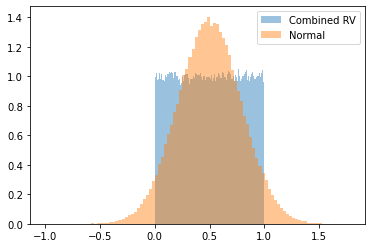


[10] Mean 5.504 std 0.957


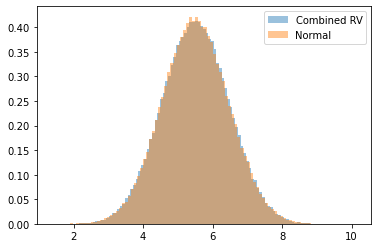


[20] Mean 10.504 std 1.325


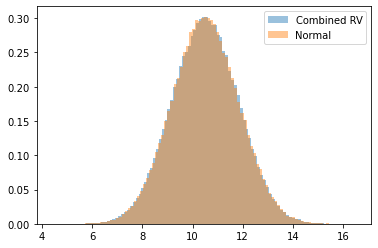


[30] Mean 15.505 std 1.610


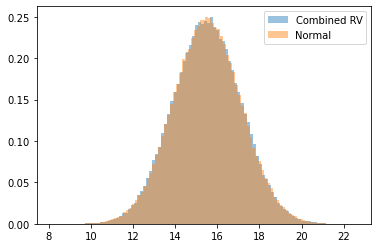


[40] Mean 20.502 std 1.850


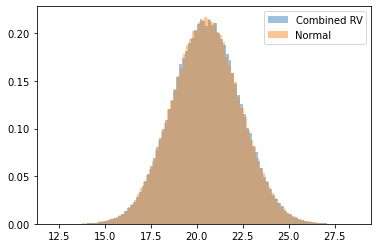


[50] Mean 25.499 std 2.061


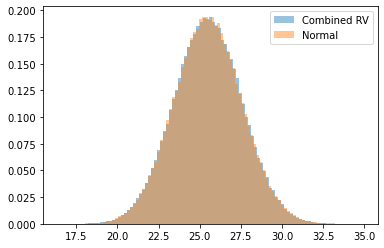


[60] Mean 30.500 std 2.253


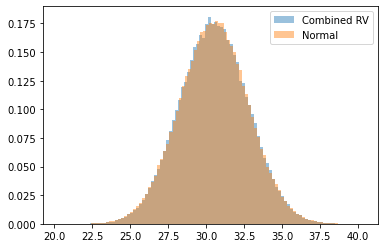


[70] Mean 35.503 std 2.431


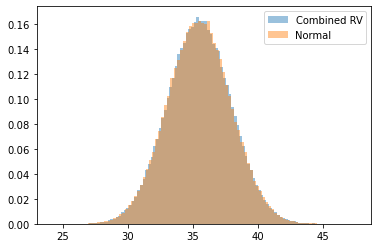


[80] Mean 40.501 std 2.597


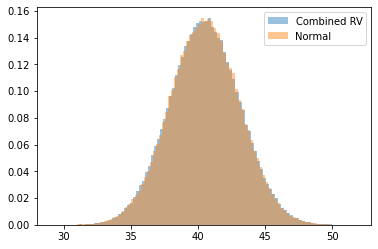


[90] Mean 45.497 std 2.753


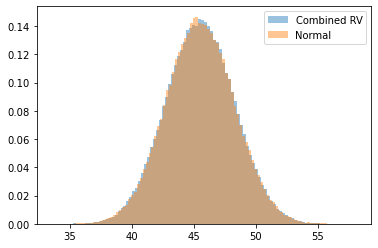


[100] Mean 50.496 std 2.904


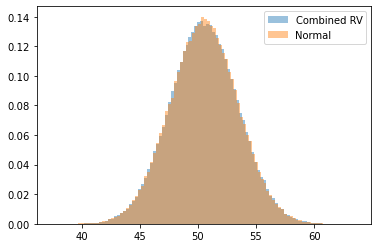

In [72]:
# central limit theorem

size = 200_000
params = dict(bins=100, alpha=0.45, density=True)
n_iter = 100

# probability density function of random variable
pdf = np.random.uniform


# plot distribution of random variable
rv = pdf(size=size)

# plot pdf of normal with same mean and variance
mu, sigma = rv.mean(), rv.std()
normal = np.random.normal(mu, sigma, size=size)


# plot initial distribution
print(f'Initial: Mean {mu:.3f} std {sigma:.3f}')

plt.hist(rv, **params, label="Combined RV")
plt.hist(normal, **params, label="Normal")

plt.legend()
plt.show()


for i in range(n_iter):
    
    # combination of independent random variables
    rv += pdf(size=size)
    
    mu, sigma = rv.mean(), rv.std()
    
    # normal with same mean and variance
    normal = np.random.normal(mu, sigma, size=size)

    # plot convergence
    j = i + 1
    if j % int(n_iter/10) == 0:
        
        print(f'\n[{j}] Mean {mu:.3f} std {sigma:.3f}')
        
        plt.hist(rv, **params, label="Combined RV")
        plt.hist(normal, **params, label="Normal")
        
        plt.legend()
        plt.show()

<a id=set-theory></a>

---

[**Back to Contents**](#contents)


# Chapter 1: Set Theory

<center><img src=https://64.media.tumblr.com/7092ad177bb687ff5677a13b2f667d9a/tumblr_njjnx6cUB51sjxldqo5_500.gif><\center>

## Basic Membership and Relationships

We use capital letters to denote sets by convention.

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

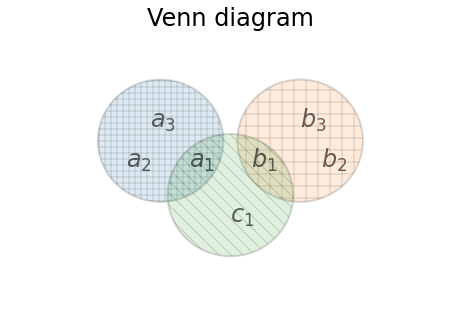

<b style="color:"><u>Elements and Membership</u></b>

We say that $a_1, a_2,$ and $a_3$ are members or elements of $A$

<IPython.core.display.Math object>

and that $b_1$ and $c_1$ are not members of $A$

<IPython.core.display.Math object>

In [2]:
# basic sets

md('## Basic Membership and Relationships')
vspace()


# initialize sets
md('We use capital letters to denote sets by convention.')

# set A
a1, a2, a3 = sp.symbols('a_1, a_2, a_3')
A = sp.FiniteSet(a1, a2, a3)

Lx('A', A).show(center=False)


# set B
b1, b2, b3 = sp.symbols('b_1, b_2, b_3')
B = sp.FiniteSet(b1, b2 ,b3)

Lx('B', B).show(center=False)


# set C
c1 = sp.symbols('c_1')
C = sp.FiniteSet(a1, b1, c1)

Lx('C', C).show(center=False) # mix of a_i, b_i, c_i elements

vspace()


# draw venn diagram

sets = {
    'A' : {'xy' : (-5,  2), 'size' : (9, 9), 'patch' : Ellipse, 'format' : {}},
    'B' : {'xy' : ( 5,  2), 'size' : (9, 9), 'patch' : Ellipse, 'format' : {}},
    'C' : {'xy' : ( 0, -2), 'size' : (9, 9), 'patch' : Ellipse, 'format' : {}},
}

X = {nm : sets[nm]['xy'][0] for nm in sets}
Y = {nm : sets[nm]['xy'][1] for nm in sets}

elements = {'a_1' : {'xy' : (X['A'] * 0.60, Y['A'] * 0.00), 'format' : {}},
            'a_2' : {'xy' : (X['A'] * 1.50, Y['A'] * 0.00), 'format' : {}},
            'a_3' : {'xy' : (X['A'] * 1.15, Y['A'] * 1.50), 'format' : {}},
            'b_1' : {'xy' : (X['B'] * 0.30, Y['B'] * 0.00), 'format' : {}},
            'b_2' : {'xy' : (X['B'] * 1.30, Y['B'] * 0.00), 'format' : {}},
            'b_3' : {'xy' : (X['B'] * 1.00, Y['B'] * 1.50), 'format' : {}},
            'c_1' : {'xy' : (X['C'], Y['C'] * 2), 'format' : {}},
       }

# initialize diagram and plt
venn = VennDiagram(sets, elements)

fig, ax = venn.plot()

ax.set_title('Venn diagram', fontsize=24, ha='center')

plt.show()

# set membership

textbu('Elements and Membership')

md('We say that $a_1, a_2,$ and $a_3$ are members or elements of $A$')

Lx(a1, a2, a3, r'\in A', sep=',').show(center=False)

md('and that $b_1$ and $c_1$ are not members of $A$')

Lx(b1, c1, r'\not\in A', sep=',').show(end='.', center=False)


---

## Special Sets

<b style="color:"><u>The Empty Set</u></b>

The `empty set` is the set that has no members.

<IPython.core.display.Math object>

<b style="color:"><u>Singleton Sets</u></b>

A **`singleton`** is a set that has only one member. For example

<IPython.core.display.Math object>

<b style="color:"><u>The Universal Set</u></b>

The **`universal set`** contains all members of interest.

<IPython.core.display.Math object>

The sets $A, B,$ and $C$ are all contained in $U$. Thus they are called subsets of $U$.

<IPython.core.display.Math object>

We can also call $U$ the superset of $A, B,$ and $C$.

<IPython.core.display.Math object>

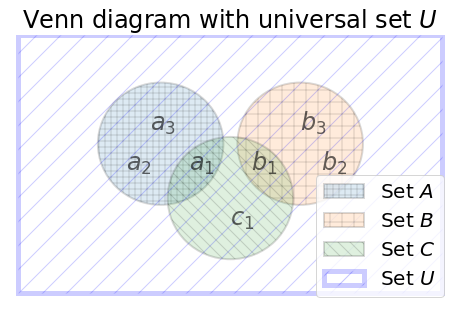

In [3]:
# special sets

md('---')
md('## Special Sets')

# empty/null set
textbu('The Empty Set')

md('The `empty set` is the set that has no members.')

Φ = sp.FiniteSet() # does not contain anything

Lx(Φ, '\{\}').show(center=False)
vspace()


# singletons
textbu('Singleton Sets')

md('A **`singleton`** is a set that has only one member. For example')

Lx(r'\text{e.g.:}\; \{ a_1 \}', '\{ 7 \}', '\{ 1.2345 \}', sep=',').show(center=False)
vspace()


# universal set
textbu('The Universal Set')

md('The **`universal set`** contains all members of interest.')

Lx('U', U:=A | B | C).show(center=False)
vspace()

md('The sets $A, B,$ and $C$ are all contained in $U$. Thus they are called subsets of $U$.')

Lx('A, B, C', r'\subseteq', 'U', sep='').show(center=False)
vspace()

md('We can also call $U$ the superset of $A, B,$ and $C$.')

Lx('U', r'\supseteq', 'A, B, C', sep='').show(center=False)
vspace(1)


# venn diagram 2
fig, ax = venn.plot()

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

x_U, y_U = (0.95*xmin, 0.9*ymin)

setU = Rectangle(xy=(x_U, y_U), label='Set $U$', ec='blue', lw=5,
                 width=0.95*(xmax-xmin), height=0.95*(ymax-ymin),
                 fill=False, alpha=0.2, hatch='/')

ax.add_patch(setU)

ax.legend(fontsize=20, loc=4)

ax.set_title('Venn diagram with universal set $U$', fontsize=24)

plt.show()

In [4]:
# special infinite sets

md('--- \n ## Special Infinite Sets')
vspace()

textbu('Countably Infinite Sets')

md('Famouse **`countable`** sets include the natural numbers $\mathbb{N}$, integers $\mathbb{Z}$, \
the rationals $\mathbb{Q}$.')

# natural numbers
Lx(r'\mathbb{N}', r'\left\{ 1, 2, 3, 4... \right\}').show(center=False)

# integers
Lx(r'\mathbb{Z}', r'\left\{ 0, 1, -1, 2, -2... \right\}').show(center=False)

# rationals
Lx(r'\mathbb{Q}', r'\left\{ 0, 1, \frac{1}{2}, 2, \frac{1}{3}, \frac{2}{3}... \right\}').show(center=False)


vspace()
textbu('Uncountable Sets')

md('Famouse **`uncountable`** sets include the real $\mathbb{R}$ and the complex numbers $\mathbb{C}$.')

# reals
Lx(r'\mathbb{R}', '=', '(-\infty, +\infty)', r'\ni \sqrt{2}, \pi, e, ϕ ...', sep='').show(center=False)

Lx(r'\mathbb{C}', '=', r'\left\{ a + bi : a, b \in \mathbb{R}, i = \sqrt{-1} \right\}', r'\ni 1 + 2i', sep='').show(center=False)


md('More on this later.')

md('---')

--- 
 ## Special Infinite Sets

<b style="color:"><u>Countably Infinite Sets</u></b>

Famouse **`countable`** sets include the natural numbers $\mathbb{N}$, integers $\mathbb{Z}$, the rationals $\mathbb{Q}$.

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<b style="color:"><u>Uncountable Sets</u></b>

Famouse **`uncountable`** sets include the real $\mathbb{R}$ and the complex numbers $\mathbb{C}$.

<IPython.core.display.Math object>

<IPython.core.display.Math object>

More on this later.

---

## Set Operations

In [5]:
# intersection
textbu('Intersection')

Lx('A \cap C', A & C, Plug(A & C, elements)).show(center=False)
   
vspace()

# disjoint sets
textbu('Disjoint Sets')

md('Two sets are **`disjoint`** if their intersection is the empty set.')

Lx(r'S_1 \cap S_2 = \emptyset \iff S_1 \text{ and } S_2 \text{ are disjoint.}').show(center=False)
vspace()


textbu('Examples of disjoint sets:')

md('Since their intersection is empty, $A$ and $B$ are disjoint sets.')

Lx('A \cap B', A & B, Φ).show(center=False)

md('Following the definition, the empty set is disjoint with all sets.')

Lx('A \cap \emptyset', A & Φ).show(center=False)

Lx('\emptyset \cap \emptyset', Φ & Φ).show(center=False)

vspace()

<b style="color:"><u>Intersection</u></b>

<IPython.core.display.Math object>

<b style="color:"><u>Disjoint Sets</u></b>

Two sets are **`disjoint`** if their intersection is the empty set.

<IPython.core.display.Math object>

<b style="color:"><u>Examples of disjoint sets:</u></b>

Since their intersection is empty, $A$ and $B$ are disjoint sets.

<IPython.core.display.Math object>

Following the definition, the empty set is disjoint with all sets.

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [6]:
# union
textbu('Union:')

Lx(r'A \cup C =', A, r'\cup', C, '=', A | C, sep='').show(center=False)
vspace()

# disjoint unions
textbu('Disjoint Unions')

md('Unions between **`disjoint`** sets.')

Lx(r'A \dot\cup B =', A, r'\cup', B, '=', A | B, sep='').show(center=False)

# disjoint union with empty set
Lx(r'A \dot\cup \emptyset =', A, r'\cup', Φ, '=', A | Φ, sep='').show(center=False)


vspace()

<b style="color:"><u>Union:</u></b>

<IPython.core.display.Math object>

<b style="color:"><u>Disjoint Unions</u></b>

Unions between **`disjoint`** sets.

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:
# difference (subtract)
textbu('Differences (subtraction):')

# A minus C
Lx('A \setminus C', A - C, Plug(A - C, elements)).show(center=False)
Lx('C \setminus A', C - A, Plug(C - A, elements)).show(center=False)
vspace()

# complement
textbu('Complement')

md('The **`complement`** of a set is its difference from the universal set $U$.')

Lx('A^c = U \setminus A', U - A).show(center=False)
vspace()


# symmetric difference
textbu('Symmetric Differences:')

md('Union of the differences between two sets.')

Lx('A \Delta C', A ^ C, Plug(A ^ C, elements)).show(center=False)
vspace()

<b style="color:"><u>Differences (subtraction):</u></b>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<b style="color:"><u>Complement</u></b>

The **`complement`** of a set is its difference from the universal set $U$.

<IPython.core.display.Math object>

<b style="color:"><u>Symmetric Differences:</u></b>

Union of the differences between two sets.

<IPython.core.display.Math object>

In [8]:
# De Morgan's laws

md('---')

textbu('De Morgan\'s Laws')
vspace()

Lx(r'1.\quad (S_1 \cup S_2)^c', 'S_1^c \cap S_2^c').show(center=False)
Lx(r'2.\quad (S_1 \cap S_2)^c', 'S_1^c \cup S_2^c').show(center=False)


# Example 1
md('---')

textbu('Example 1:')

md('Complement of union:')

Lx('(A \cup C)^c', AuC_c := U - (A | C)).show(center=False)
vspace()


md('Intersect of complements:')

Lx('A^c =', Ac := (U-A), '\quad C^c =', Cc := (U-C), sep='').show(center=False)
Lx('A^c \cap C^c', Ac & Cc, Ac_n_Cc := Plug(Ac & Cc, elements)).show(center=False)
vspace()


md('Equivalence:')

Lx('(A \cup C)^c', 'A^c \cap C^c', Ac_n_Cc).show(center=False)


# Example 2
md('---')

textbu('Example 2:')


md('Complement of intersection:')

Lx('(A \cap C)^c', U - (A & C), AnC_c := Plug(U - (A & C), elements)).show(center=False)
vspace()


md('Union of complements:')

Lx('A^c =', Ac := (U-A), '\quad C^c =', Plug(Cc := U - C, elements), sep='').show(center=False)
Lx('A^c \cup C^c', Ac_u_Cc:=Ac | Cc).show(center=False)

vspace()

md('Equivalence:')

Lx('(A \cap C)^c', 'A^c \cup C^c', Ac_u_Cc).show(center=False)
vspace()

---

<b style="color:"><u>De Morgan's Laws</u></b>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---

<b style="color:"><u>Example 1:</u></b>

Complement of union:

<IPython.core.display.Math object>

Intersect of complements:

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Equivalence:

<IPython.core.display.Math object>

---

<b style="color:"><u>Example 2:</u></b>

Complement of intersection:

<IPython.core.display.Math object>

Union of complements:

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Equivalence:

<IPython.core.display.Math object>

In [9]:
md("---")

# commutative law
textbu('The Commutative Property')

md('Unions and intersects are **`commutative`**.')

Lx('B \cup C', 'C \cup B', B | C).show(center=False)

Lx('B \cap C', 'C \cap B', '\{b_1\}').show(center=False)

vspace()

# distributive law of unions and intersects
textbu('The Distributive Property')

md('Unions and intersects are also **`distributive`**.')

Lx('A \cup (B \cap C)', '(A \cup B ) \cap (A \cup C)').show(center=False)

Lx('A \cap (B \cup C)', '(A \cup B ) \cup (A \cap C)').show(center=False)

---

<b style="color:"><u>The Commutative Property</u></b>

Unions and intersects are **`commutative`**.

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<b style="color:"><u>The Distributive Property</u></b>

Unions and intersects are also **`distributive`**.

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [10]:
# Sets of sets


# Russell's paradox and Zermelo-Fraenkel set theory (ZF/ZFC)

<a id=prob-axioms></a>

---

[**Back to Contents**](#contents)


# Chapter 2: Probability Axioms

<center><img src="https://i.pinimg.com/originals/d9/1b/5b/d91b5bc38dfc003f610cb252a97bd282.gif"></center>

In [11]:
def sigma(E, Ω):
    '''
    E : generating event set
    Ω : sample space
    '''
    # 1. Null set is an event
    Φ = sp.FiniteSet() # null set
    F = E | sp.FiniteSet(Φ)

    while True:


        F_prev = F.copy()

        # 2. closure under complements
        complements = sp.FiniteSet(*{Ω - A for A in F})
        F = F | complements

        # 3. closure under (countable) unions
        unions = sp.FiniteSet(*{A | B for A in F for B in F})
        F = F | unions

        if F == F_prev:
            break
            
    return F

In [12]:
# roulette
md('### Example: Roulette')

eur = 'https://www.casinonewsdaily.com/wp-content/uploads/guides/illustrations/roulette/european-roulette/er-clean.svg'
amr = 'https://www.casinonewsdaily.com/wp-content/uploads/guides/illustrations/roulette/american-roulette/american-roulette.svg'

if True:
    md(f'<center><img src="{eur}" width="700"/></center>')
else:
    md(f'<center?<img src="{amr}" width="700"/></center>')


vspace()

# sample space

textbu('Sample Space:')

wheel = set()
Ω = set()

nums = range(1, 11)
for i in nums:
    
    if i > len(nums)/2:
        c = 'R' if i%2 else 'B'
    else:
        c = 'B' if i%2 else 'R'
    
    ω = f'{i:02d}_{c}'
    wheel.add(ω)
    Ω.add(sp.Symbol(ω))

# add 0 green
z = '00_G'
wheel.add(z)
Ω.add(sp.Symbol(z))

Ω = sp.FiniteSet(*Ω) # numbers


Lx('\Omega &', Ω).show(center=False)
vspace()


# generating events
textbu('Events:')

events = {'black' : sp.FiniteSet(*{sp.Symbol(ω) for ω in wheel if ω[-1]=='B'}),
          'red'   : sp.FiniteSet(*{sp.Symbol(ω) for ω in wheel if ω[-1]=='R'}),
          'odd'   : sp.FiniteSet(*{sp.Symbol(ω) for ω in wheel if int(ω[:-2]) % 2}),
          'even'  : sp.FiniteSet(*{sp.Symbol(ω) for ω in wheel if not (int(ω[:-2]) % 2 or int(ω[:-2])==0)}),
          'Omega' : Ω,
         }

rev = {v:k for k, v in events.items()}

E = sp.FiniteSet(events['black'], events['red'])

Lx(r'\mathbb{E}', E.subs(rev)).show(center=False)
vspace()

# event space
textbu('Event Space:')

F = sigma(E, Ω)

Lx(r'\mathbb{F} = \sigma({\mathbb{E}})', F.subs(rev)).show(center=False)

### Example: Roulette

<center><img src="https://www.casinonewsdaily.com/wp-content/uploads/guides/illustrations/roulette/european-roulette/er-clean.svg" width="700"/></center>

<b style="color:"><u>Sample Space:</u></b>

<IPython.core.display.Math object>

<b style="color:"><u>Events:</u></b>

<IPython.core.display.Math object>

<b style="color:"><u>Event Space:</u></b>

<IPython.core.display.Math object>

# Distributions

In [13]:
# parameters
x, σ, μ = sp.symbols('x, \sigma, \mu')

# normal pdf
textbu('Normal/Gaussian probability density function (PDF):')

normal_pdf = 1/(sp.sqrt(2 * sp.pi * σ**2)) * (sp.exp(-(x-μ)**2/(2*σ**2)))

Lx('\mathbb{P}(x, \mu, \sigma)', normal_pdf).show()
vspace()

# parameters
textbu('Standard normal:')

normal_pdf = normal_pdf.subs(μ, 0).subs(σ, 1)

Lx('\mathbb{P}(x, \mu=0, \sigma=1)', normal_pdf).show()
vspace()

# integrate
textbu('Integral:')

integ = sp.Integral(normal_pdf, (x, -sp.oo, sp.oo))
Lx(integ, integ.doit()).show()


<b style="color:"><u>Normal/Gaussian probability density function (PDF):</u></b>

<b style="color:"><u>Standard normal:</u></b>

<b style="color:"><u>Integral:</u></b>